In [1]:
import pandas as pd
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('Downloads/mpg.csv')
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [5]:
# mpg가 연비를 뜻하는 것으로 보아 자동차에 대한 내용인 것 같다. 일단 누락된 행을 삭제해준다.
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [7]:
# 마력이 6개 행에서 누락되었다. 이를 없애준다.
df = df.dropna()

In [8]:
df
# mpg : 연비
# cylinders : 원형기둥 이라는 뜻인데, 배기통으로 생각하면 될 것 같다.
# displacement : 배기량
# horsepower : 마력
# weight : 중량
# acceleration : 가속 ..?
# model_year : 생산연도
# name : 이름

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [9]:
# 데이터셋의 이름도 mpg인 만큼 연비를 위주로 예측을 해보면 될 것 같다.
# 예측
# 1. 실린더 수가 많을수록 연비가 안좋을 것이다. (보통 성능이 좋을 수록 연비가 떨어진다.)
# 2. 배기량이 높을수록 연비가 안좋을 것이다.
# 3. 마력이 높을수록 연비가 안좋을 것이다.
# 4. 중량이 무거울수록 연비가 안좋을 것이다.
# 6. 최근 모델일수록 연비가 안좋을 것이다.
# 5. acceleration이 높을수록 연비가 안좋을 것이다.
# 7. 미국산과 유럽산의 연비차이는 유의미하지 않을 것이다.

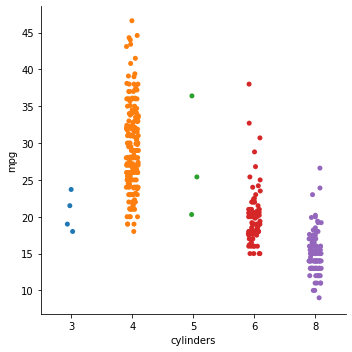

In [10]:
# 1. cylinders와 mpg의 상관관계
sns.catplot(data=df, x='cylinders', y='mpg')

In [11]:
# 이 그래프를 보면, 3과 5는 모수가 매우 적기 때문에 무시하고 cylinders가 늘어날수록 (차의 성능이 좋아지기 때문에) 연비가 안좋아지는 것을
# 명확하게 확인할 수 있다.

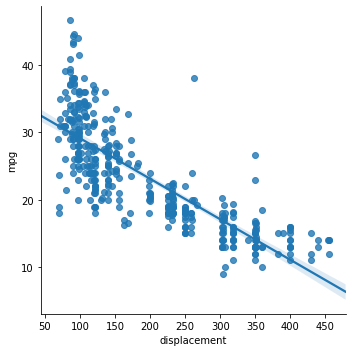

In [12]:
# 2. displacement와 mpg의 상관관계
sns.lmplot(data=df, x='displacement', y='mpg')

In [13]:
# lm plot을 이용한 이 그래프를 보면, 배기량이 높은 차, 그러니까 성능이 좋은 차일수록 연비가 낮아지는 것을 볼 수 있다.
# 배기량 수준이 제일 낮은 부분에서는 연비가 20부터 40까지 폭넓게 분포되어 있지만(이를 통해선 배기량 이외의 요소가 연비에 영향을 준 것이라는 판단 가능)
# 배기량 수준이 높아질수록 분포의 폭이 좁아진다. 이를 통해서는 배기량이 높은 차량의 경우 이게 연비에 직접적으로 영향을 미치게 되어
# 이외의 요소가 연비의 변화에 큰 영향을 미치지 못한다는 것을 확인할 수 있다.

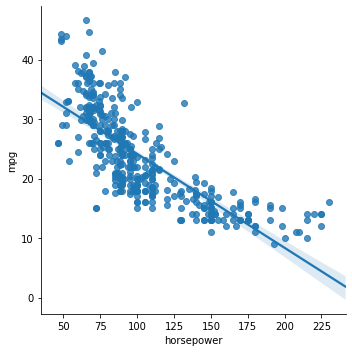

In [14]:
# 3. horsepower와 mpg의 상관관계
sns.lmplot(data=df, x='horsepower', y='mpg')

In [15]:
# 배기량의 그래프와 거의 모형이 같으므로 해석은 생략한다.

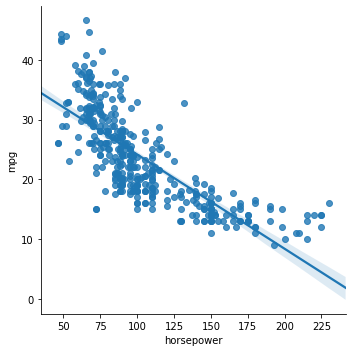

In [16]:
# 4. weight와 mpg의 상관관계
sns.lmplot(data=df, x='horsepower', y='mpg')

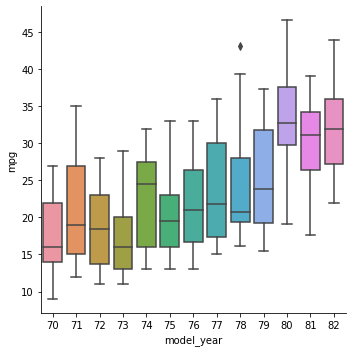

In [22]:
# 5. model_year와 mpg의 상관관계
sns.catplot(data=df, x='model_year', y='mpg', kind='box')

In [23]:
# 생산연도와 연비는, 매우 뚜렷하다고는 볼 수 없지만 생산연도가 최근에 가까워지면서
# 조금씩 연비가 증가하는 것을 볼 수 있다. 여기서 내 예측이 틀렸던 게,
# 시간이 지나면서 기술이 '같은 차 성능 수준에서 연비를 높이는 방향' 으로 발전했을 수도
# 있다는 생각을 하지 못했다. 나는 '기술이 차의 성능을 높일 것이고 그에 따라 연비는 낮아질 것이다'
# 라고 생각했다. 단편적인 시각이었던 것 같아서 아쉽다.

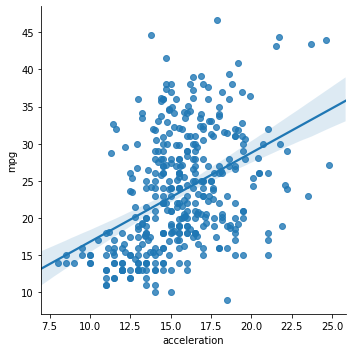

In [24]:
# 6. acceleration과 mpg의 상관관계
sns.lmplot(data=df, x='acceleration', y='mpg')

In [25]:
# 이 그래프를 통해서 봤을 땐, acceleration과 mpg가 양의 상관관계를 갖고 있긴 하지만
# 엄청 뚜렷하게 갖고 있는 건 아니라는 결론을 지었다. acceleration이 15~17.5 사이에
# 상당히 많고 넓게 분포되어 있기 때문이다.

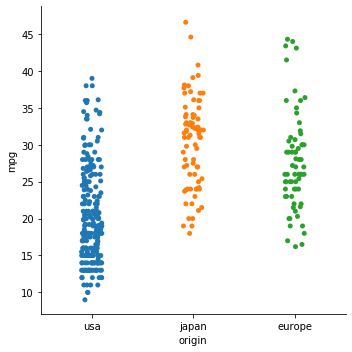

In [26]:
# 7. origin와 mpg의 상관관계
sns.catplot(data=df, x='origin', y='mpg')

In [27]:
# 이 그래프를 통해서는,
# 1. 미국산 차량의 수가 일본이나 유럽보다 월등하게 많다.
# 2. 그러나. 이러한 많은 차량은 연비가 낮은 쪽에 속해있고, 반대로
# 3. 유럽과 일본의 경우 모수는 미국에 비해 적으나 연비의 평균 수준이 미국보다 높다.
# 이것만을 통해서는, 미국의 연비가 낮은 이유가 '생산 연도' 때문인지 '차량 성능' 때문인지
# 확실하게 알 수 없다. 그래서, 미국과 다른 나라의 차들을 비교해봐야 한다.

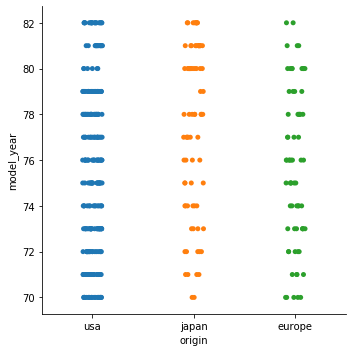

In [28]:
sns.catplot(data=df, x='origin', y='model_year')

In [ ]:
# 그래프의 정확도가 살짝 떨어지긴 하지만, 이런 부정확한 그래프로도 해석을 할 수 있다.
# 미국산 차량의 연비가 다른 두 나라에 비해 낮은 이유는 '생산 연도'와 무관하다
# 그렇다면, '차량 성능'에 의한 것이라고 결론을 내릴 수 있게 된다.
# 그래서, 세 권역 산 차량들을 성능을 기준으로 분류해보려고 한다.

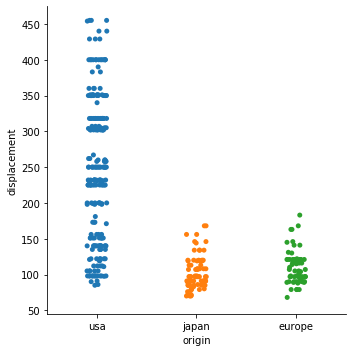

In [30]:
sns.catplot(data=df, x='origin', y='displacement')

In [31]:
# 배기량의 경우 차이점이 확연하게 드러난다. 미국산 차량의 배기량이 다른 두 나라의 것에
# 비해 평균적으로 매우 높은 수준을 보인다. 다른 지표도 확인해보자.

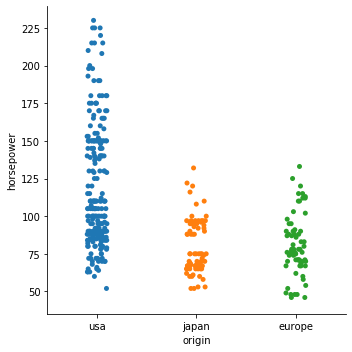

In [32]:
sns.catplot(data=df, x='origin', y='horsepower')

In [33]:
# 마력의 경우에도 확연한 차이점을 보인다.

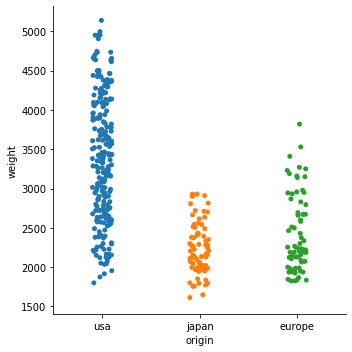

In [34]:
sns.catplot(data=df, x='origin', y='weight')

In [35]:
# 중량에서도 확인할 수 있다.

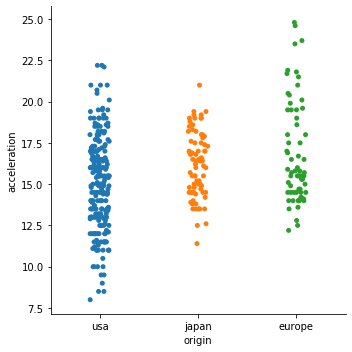

In [36]:
sns.catplot(data=df, x='origin', y='acceleration')

In [37]:
# 위에서 확인한 acceleration과 mpg의 상관관계를 봤을 때, 미국산 차량의 acceleration이
# 다른 두 나라에 비해 월등하게 낮은 지점이 많이 존재해야 조건을 충족할 수 있었으나,
# 확실히 낮은 지점이 존재하긴 하지만 뚜렷한 나머지 다른 세 지표에 비해 그 정도가 낮기에
# acceleration은 미국산 차량의 연비가 다른 두 나라산에 비해 낮은 이유를 설명하기에 부족하다.

In [ ]:
# 결론
# 1. 실린더 수가 많을수록 연비가 안좋을 것이다. (보통 성능이 좋을 수록 연비가 떨어진다.) -> O
# 2. 배기량이 높을수록 연비가 안좋을 것이다. -> Yes
# 3. 마력이 높을수록 연비가 안좋을 것이다. -> Yes
# 4. 중량이 무거울수록 연비가 안좋을 것이다. -> Yes
# 6. 최근 모델일수록 연비가 안좋을 것이다. -> No (한 측면만 고려한 시각이었다.)
# 5. acceleration이 높을수록 연비가 안좋을 것이다. -> HELL NO(완전히 잘못 생각했다. 용어의 뜻을 잘 몰랐기 때문..)
# 7. 미국산과 유럽산의 연비차이는 유의미하지 않을 것이다.
# -> No(미국산 차량의 성능이 다른 두 나라에 비해 뛰어났음이 드러났기 때문에 결국 연비는 더 안좋게 나왔고, 그에 따라
# 연비차이는 유의미한 수준이라는 결론에 도달할 수 있었다.)